# Predicting House Price

The goal of this project is to build a machine learning model to predict the sale price of house based on different independet variables related to house (e.g. size, number of rooms, build year, etc.)

As we are predicting dependent variable House Price, which is continuous variable, we will apply linear regression model to predict the price

### 1. Loading the data

In [4]:
# load required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# for the yeo-johnson transformation
import scipy.stats as stats

# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)


In [5]:
# Load the training dataset
data = pd.read_csv('train.csv')

In [6]:
print(data.shape)

data.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
# Id variable doesn't make any sense, so we drop it
data.drop('Id', axis=1, inplace=True)

In [8]:
data.shape

(1460, 80)

## 2. Feature Selection

### Data Analysis
Target variable is SalePrice
Out of other 79 variables, We need to analyze which variables are the most useful in predicting SalePrice

We need to analyze following:
Variable Types (categorical and numerical)
Numberical variables: Discrete, Continuous, Distributions
Categorical variables: Cardinality, Rare Labels, Special mappings
Missing data





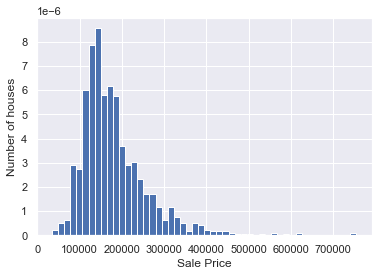

In [9]:
# Let's begin with analyzing target variable

# Histogram to evaluate target distribution
data['SalePrice'].hist(bins=50, density=True)
plt.xlabel("Sale Price")
plt.ylabel('Number of houses')
plt.show()


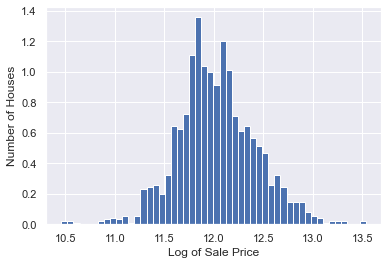

In [10]:
# Target is continuous and the distribution is skewed towards the right
# We can improve the distribution with a transformation (e.g. yeo-johnson or logarithmic transformation)

# Let's transform using logarithmic transformation
np.log(data['SalePrice']).hist(bins=50, density=True)
plt.xlabel('Log of Sale Price')
plt.ylabel('Number of Houses')
plt.show()

In [11]:
# the distribution is more Gaussian now
# So moving forward, we will predict log of sales price of the house

#### Identify Categorical variables

In [12]:
# Now, let's identify the categorical variables, those are of type "Object" in dataframe.

cat_vars = [var for var in data.columns if data[var].dtype == 'O']

# MSSubClass is also categorical by definition, although the values are numeric
# let's add it to the list of categorical variables
cat_vars = cat_vars + ['MSSubClass']

#number/length of categorical variabled
len(cat_vars)

44

In [13]:
# Cast all variables as categorical
data[cat_vars] = data[cat_vars].astype('O')

#### Identify Numerocal variables

In [14]:
# Now, let's identify the numerical variabled

num_vars = [
    var for var in data.columns if var not in cat_vars and var != 'SalePrice'
]

len(num_vars)

35

### Missing Values

In [15]:
# Let's find out which variables of the dataset contain missing values

In [16]:
# Let's capture the variables where there are missing values:
vars_with_na = [var for var in data.columns if data[var].isnull().sum() > 0]

# Determine percentage of missing values (expressed as decimals) and
# Display the result ordered by % of missing data

data[vars_with_na].isnull().mean().sort_values(ascending=False)


PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

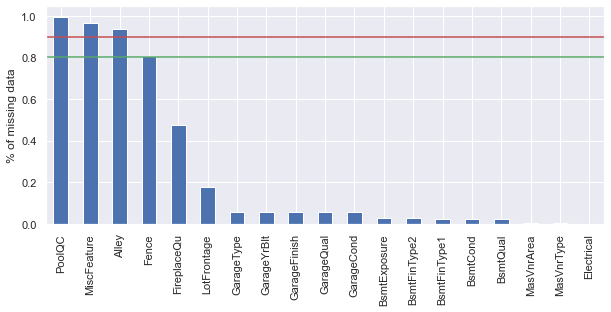

In [17]:
# Let's plot the variables with missing values in descending order of % missing values

data[vars_with_na].isnull().mean().sort_values(ascending=False).plot.bar(figsize=(10,4))
plt.ylabel('% of missing data')
plt.axhline(y=0.9, color='r', linestyle='-')
plt.axhline(y=0.8, color='g', linestyle='-')

plt.show()

In [18]:
# Now, let's find variables with missing data and see which are numerical and categorical

cat_na = [var for var in cat_vars if var in vars_with_na]
num_na = [var for var in num_vars if var in vars_with_na]

print('Number of categorical variables with na: ', len(cat_na))
print('Number of numerical variables with na: ', len(num_na))

Number of categorical variables with na:  16
Number of numerical variables with na:  3


### Relationship between missing data and sale price

Let's evaluate the price of house in those observations where the data is missing. We will do this for each variable that show missing data

In [19]:
def analyse_na_value(df, var):
    # copy the dataframe to avoid overwriting
    df = df.copy()
    
    # let's have a variable which will be 1 if data is missing, 0 otherwise
    df[var] = np.where(df[var].isnull(),1,0)
    
    #Let's compare the median Saleprice in the observations where data is missing vs the observation where data is available
    
    #Determine the median price in the group 1 and 0, and std deviation of sale price
    # and we capture result in a temp dataset
    tmp = df.groupby(var)['SalePrice'].agg(['mean','std'])
    
    #plot into a bar graph
    tmp.plot(kind='barh', y='mean', legend=False,
            xerr='std', title="Sale Price", color='g')
    
    plt.show()
    

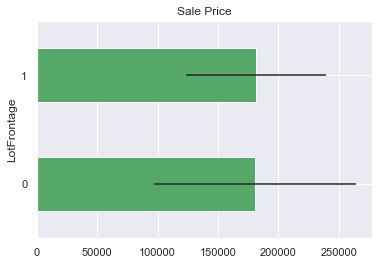

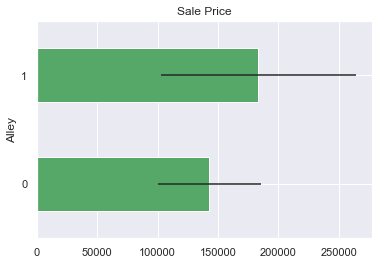

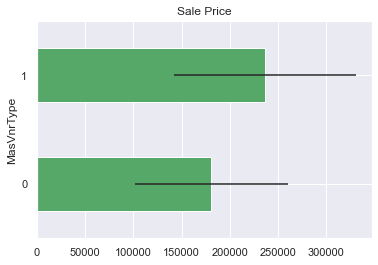

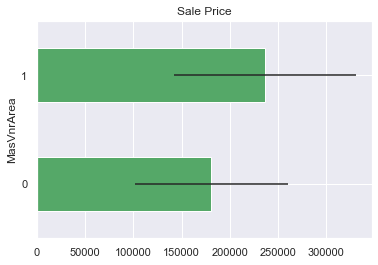

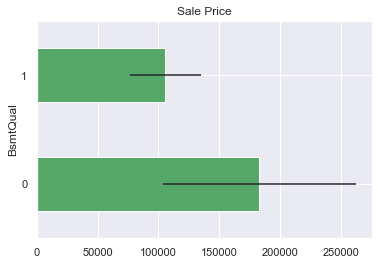

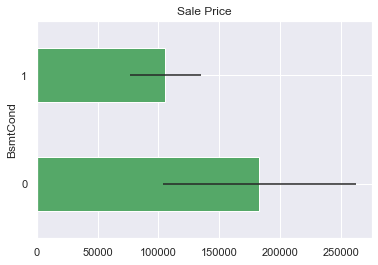

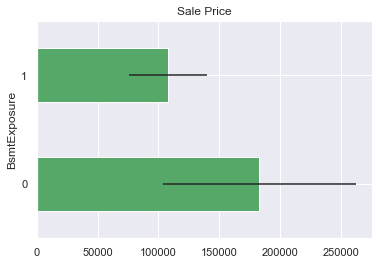

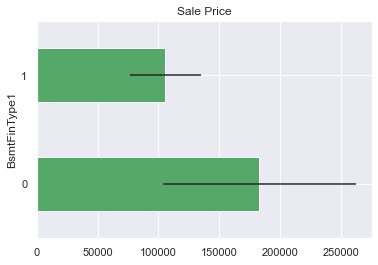

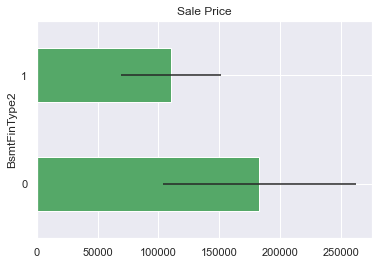

C:\Users\hpanc\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:45: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Users\hpanc\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:41: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


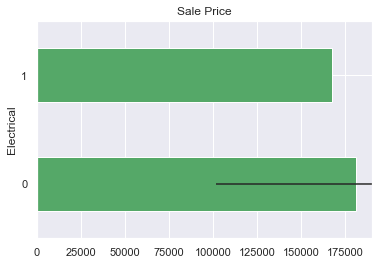

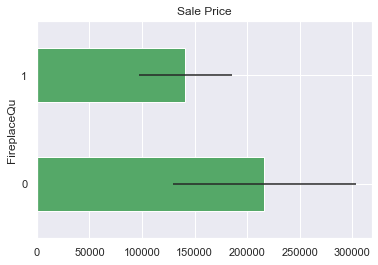

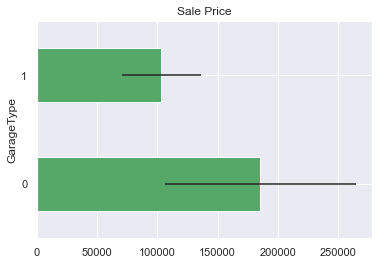

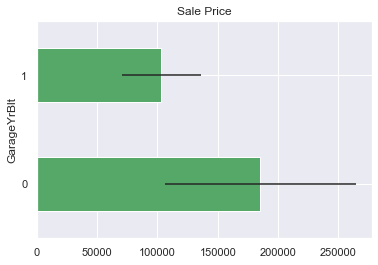

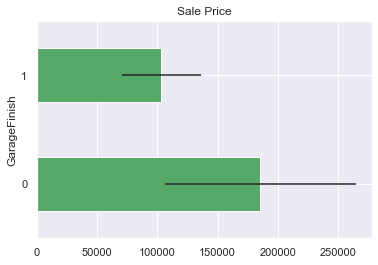

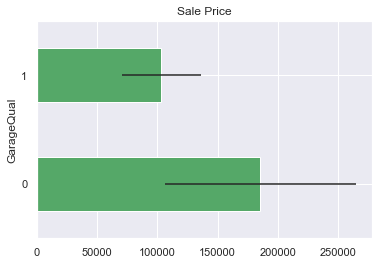

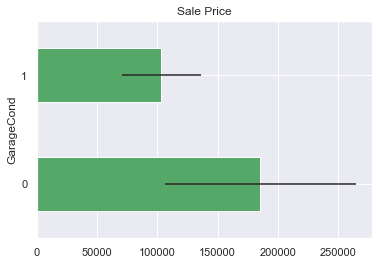

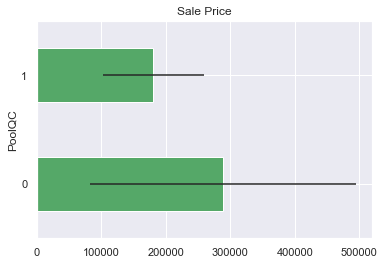

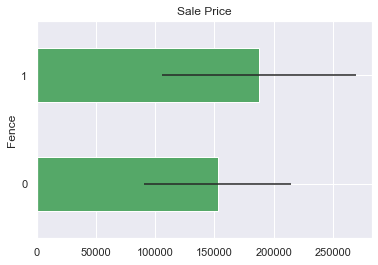

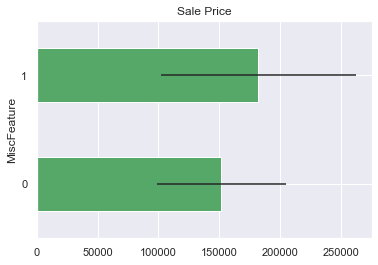

In [20]:
# Now, let's run the function on each variable with missing data

for var in vars_with_na:
    analyse_na_value(data, var)

### Numerical Variables Analysis

In [21]:
# LEt's go ahead and find out what numerical variables we have in dataset

In [22]:
print('Number of numerical variables :', len(num_vars))

#Visualize numerical variables
data[num_vars].head()

Number of numerical variables : 35


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008


#### Temporal variables

We have 4 year variables in the dataset:
- YearBuilt: year in which the house was built
- YearRemodAdd: year in which the house was remodeled
- GarageYrBlt: year in which a garage was built
- YrSold: year in which the house was sold

We generally don't use date variables in their raw format. Instead, we extract information from them. For example, we can capture the difference in years between the years the house was built and the year the house was sold.

In [23]:
# List of variables that contain year information

year_vars = [var for var in num_vars if 'Yr' in var or 'Year' in var]

year_vars

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [24]:
# Let's explore the values of these temporal variables

for var in year_vars:
    print(var, data[var].unique())
    print()

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]

YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]

GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 200

Text(0, 0.5, 'Median House price')

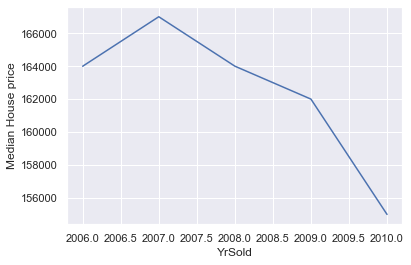

In [25]:
# We can explore the evolution of the sale price with the years in which the house was sold

# plot median sale price vs year in which it was sold

data.groupby('YrSold')['SalePrice'].median().plot()
plt.ylabel('Median House price')

In [26]:
# This drop in the house sale price is unusual. In real life, the house prices typically goes up as years go by

# Let's further explore the data. Let's plot the price of sale vs year in which it was build

Text(0, 0.5, 'Median House Price')

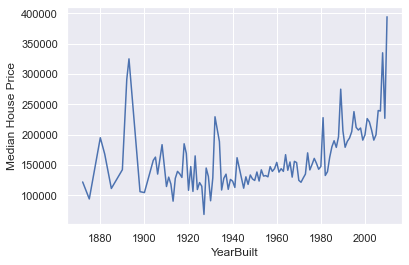

In [27]:
# Plot median sale price vs year in which the house was built

data.groupby('YearBuilt')['SalePrice'].median().plot()
plt.ylabel('Median House Price')

In [28]:
# We can see that newly built houses tend to be more expensive

# We can hypothesize that price drop could be becuase older houses were sold. Let's have a look at this

In [29]:
# For this, we will capture the elapsed years between the year variables and the year in which the house was sold

def analyse_year_vars(df, var):
    df = df.copy()
    
    # capture difference between a year variable and year in which the house sold
    df[var] = df['YrSold'] - df[var]
    
    df.groupby('YrSold')[var].median().plot()
    plt.ylabel('Time from ' + var)
    plt.show()

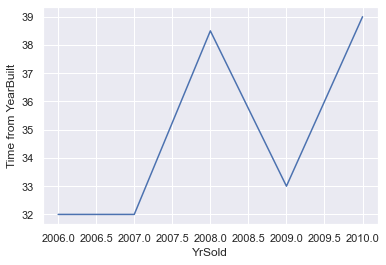

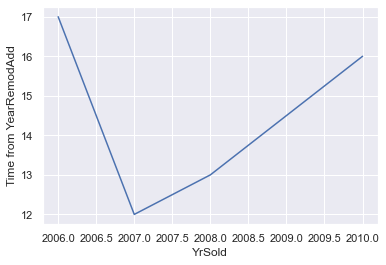

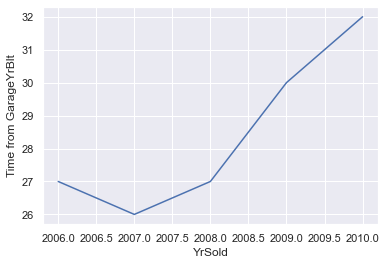

In [30]:
for var in year_vars:
    if var != 'YrSold':
        analyse_year_vars(data, var)

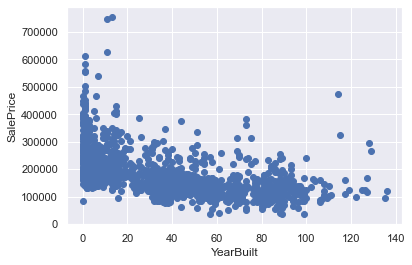

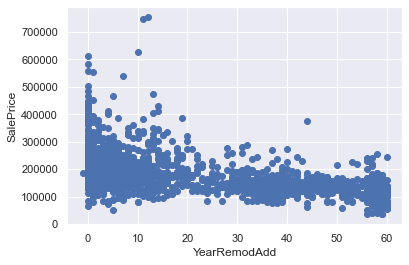

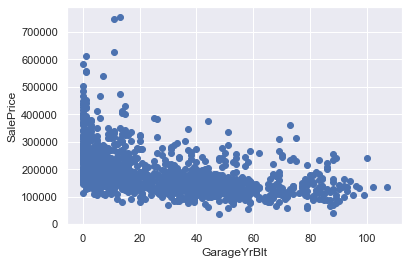

In [31]:
# Now let's plot elapsed time vs sale price

def analyse_year_vars(df, var):
    
    df = df.copy()
    
    # capture difference between a year variable and year in which the house sold
    df[var] = df['YrSold'] - df[var]
    
    plt.scatter(df[var], df['SalePrice'])
    plt.ylabel('SalePrice')
    plt.xlabel(var)
    plt.show()
    

for var in year_vars:
    if var != 'YrSold':
        analyse_year_vars(data, var)
    

### Discrete Variables

Variables that can take finite number of values

In [32]:
# Let's make a list of discrete variables
discrete_vars = [var for var in num_vars if len(
       data[var].unique()) < 20 and var not in year_vars]

print('Number of discrete variables: ', len(discrete_vars))

Number of discrete variables:  13


In [33]:
# Let's visualize the discrete variables

data[discrete_vars].head()

,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,PoolArea,MoSold
0,7,5,1,0,2,1,3,1,8,0,2,0,2
1,6,8,0,1,2,0,3,1,6,1,2,0,5
2,7,5,1,0,2,1,3,1,6,1,2,0,9
3,7,5,1,0,1,0,3,1,7,1,3,0,2
4,8,5,1,0,2,1,4,1,9,1,3,0,12


These discrete variables tend to be qualifications (Qual) or grading scales (Cond), or refer to the number of rooms, or units (FullBath, GarageCars), or indicate the area of the room (KitchenAbvGr)

We expect higher prices, with bigger numbers

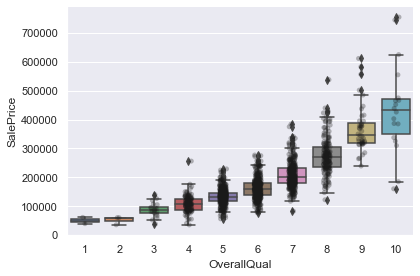

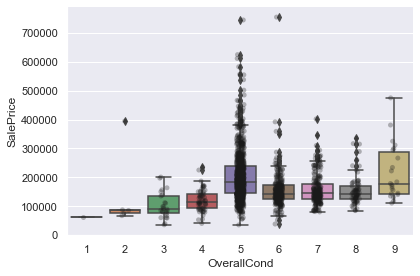

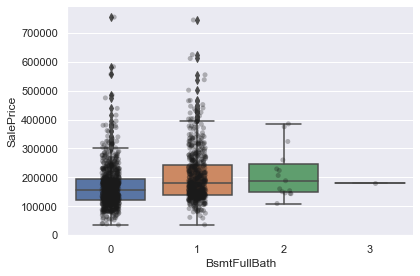

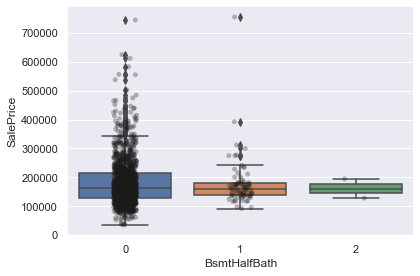

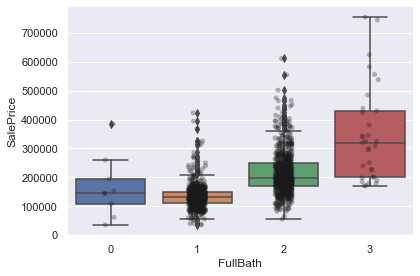

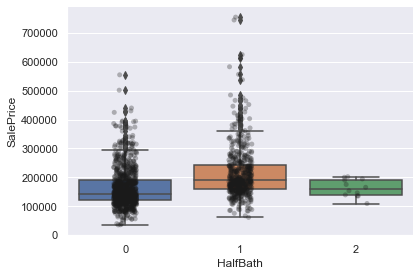

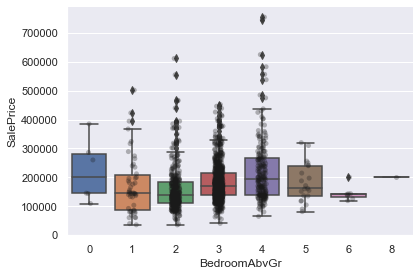

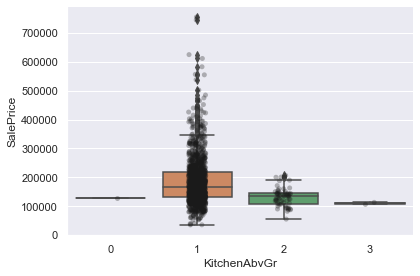

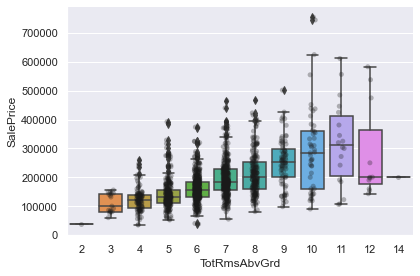

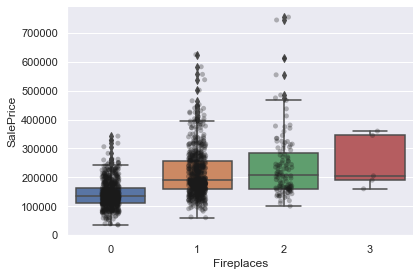

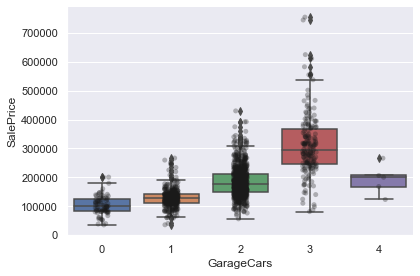

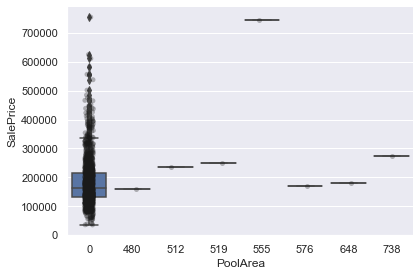

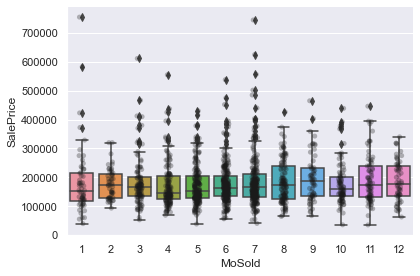

In [34]:
# We will plot saleprice vs each of these discrete variables
for var in discrete_vars:
    # make boxplot with Catplot
    sns.catplot(x=var, y="SalePrice", data=data, kind="box", height=4, aspect=1.5)
    
    # add data points to boxplot with stripplot
    sns.stripplot(x=var, y="SalePrice", data=data, jitter=0.1, alpha=0.3, color='k')
    plt.show()


## Continuous Variables

Let's go ahead and find the distribution of the continuous variables. We will consider continuous variables to all those that are not temporal or discrete.

In [35]:
# make list of continuous variables
cont_vars = [var for var in num_vars if var not in discrete_vars+year_vars]

print("Number of continuous variables: ", len(cont_vars))

Number of continuous variables:  18


In [36]:
# Let's visualize the continuous variables
data[cont_vars].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0


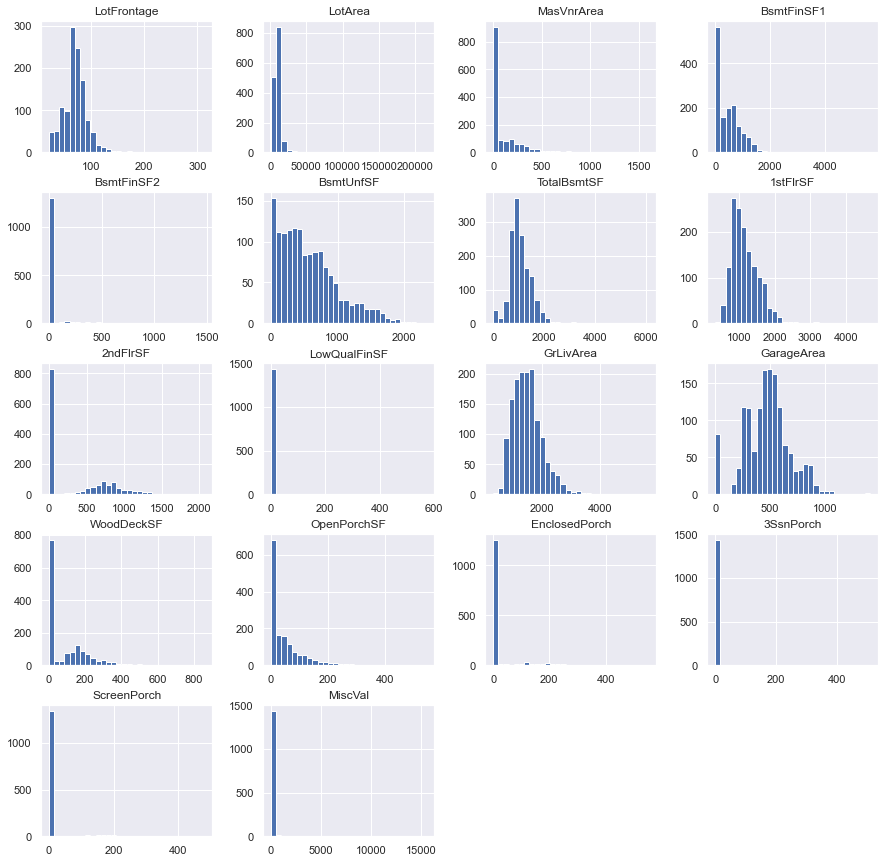

In [37]:
# Let's plot histograms for all continuous variables:

data[cont_vars].hist(bins=30, figsize=(15,15))
plt.show()

The variables are not normally distributed. And there are a particular few that are extremely skewed like 3SsnPorch, ScreenPorch, and MiscVal.

Sometimes, transforming the variables to improve the value spread, improves the model performance. But it is unlikely that transformation will help change the distribution of the super skewed variables dramatically.

We can apply a Yeo-Johnson transformation to variables like LotFrontage, LotArea, BsmUnfSF, and a binary transformation to variables like 3SsnPorch, ScreenPorch and MiscVal.

In [38]:
# First let's make a list with the superskewed variables

skewed = ['BsmtFinSF2','LowQualFinSF','EnclosedPorch','3SsnPorch','ScreenPorch','MiscVal']

In [39]:
# Capture the remaining continuous variables
cont_vars = [var for var in cont_vars if var not in skewed]
print(cont_vars)

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']


### Yeo-Johnson Transformation

Let's go ahead and analyse the distributions of the variables after applying Yeo-Johnson transformation

In [40]:
type(data['LotFrontage'].shape)

tuple

In [41]:
tmp = data.copy()

for var in cont_vars:
    #transform the variable to yeo-johnson
   print(type(data[var].to_numpy()))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


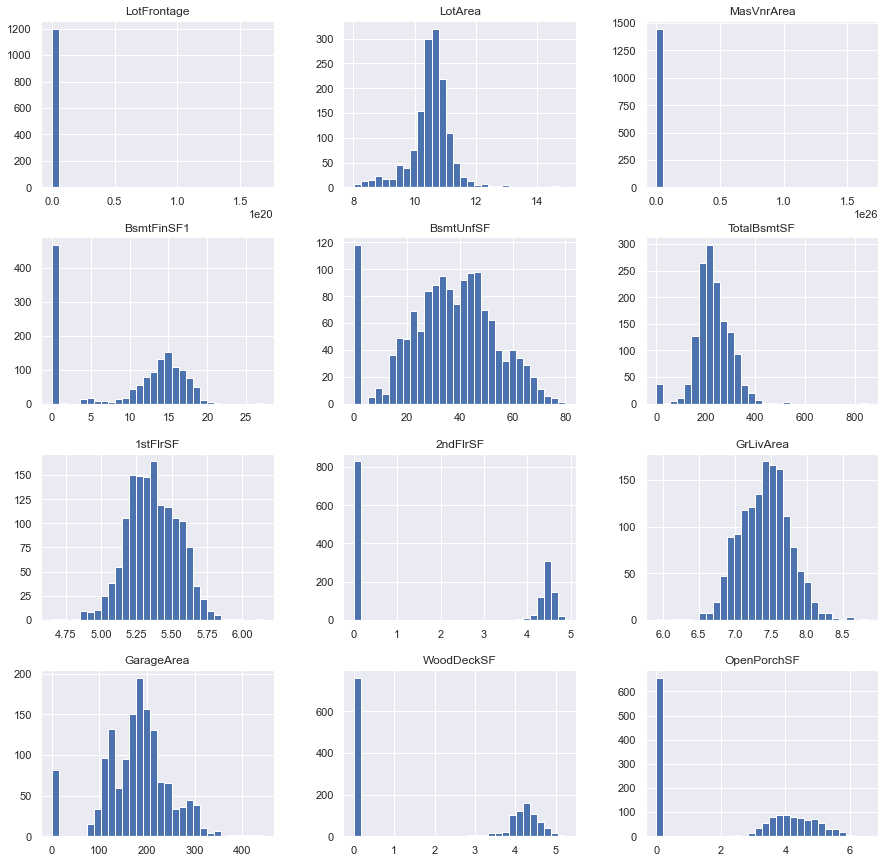

In [42]:
# Copy the data temporarily
tmp = data.copy()

for var in cont_vars:
    #transform the variable to yeo-johnson
    tmp[var], param = stats.yeojohnson(data[var])


# Plot the histograms of the transformed variables
tmp[cont_vars].hist(bins=30, figsize=(15,15))
plt.show()

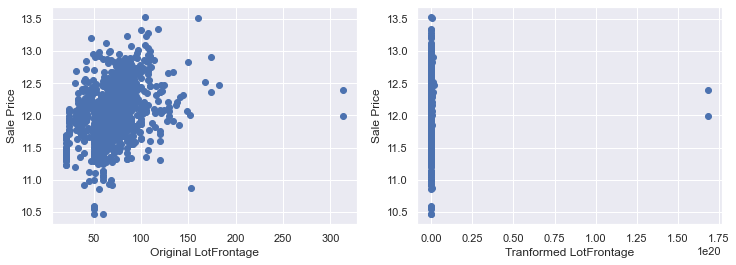

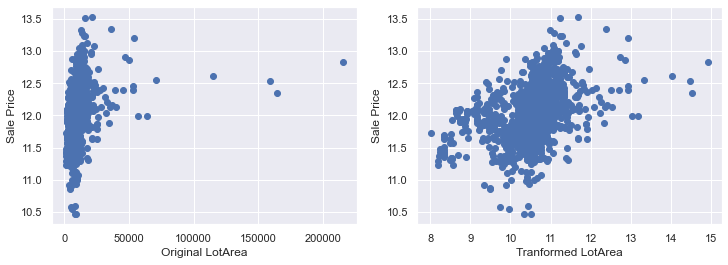

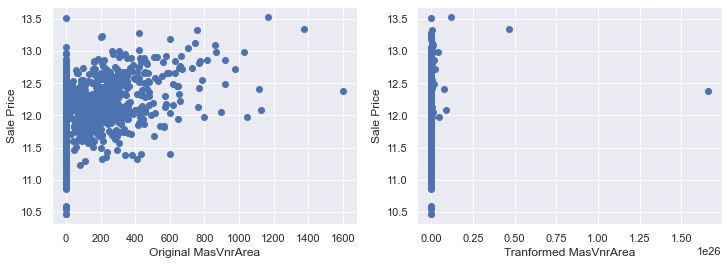

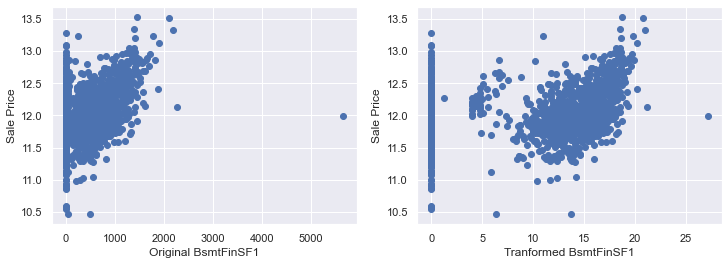

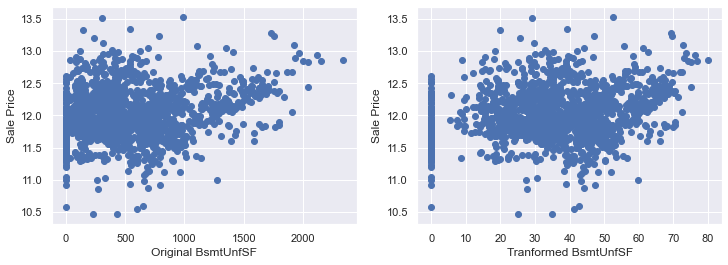

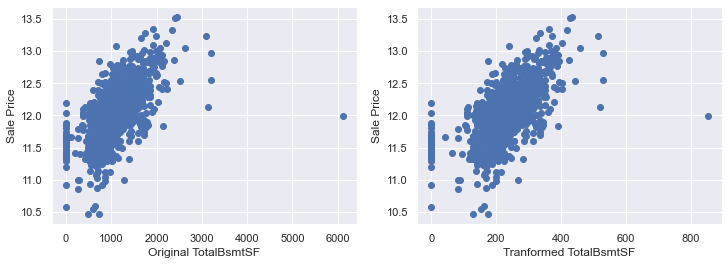

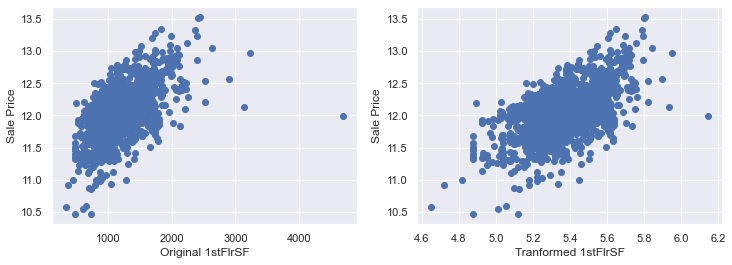

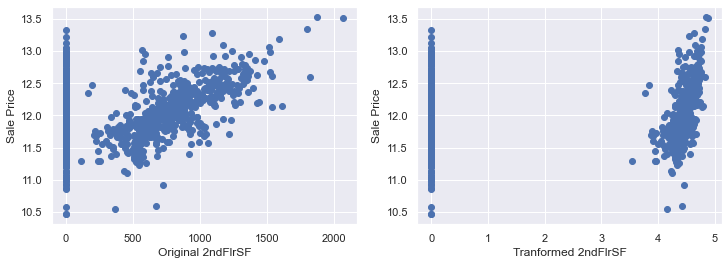

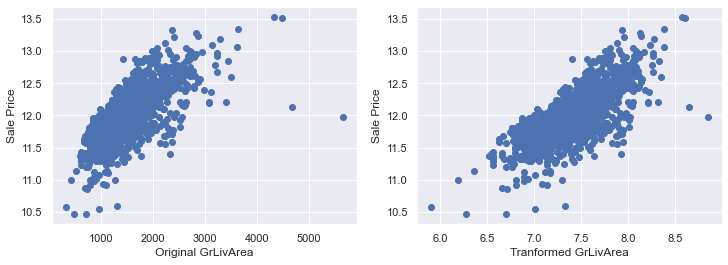

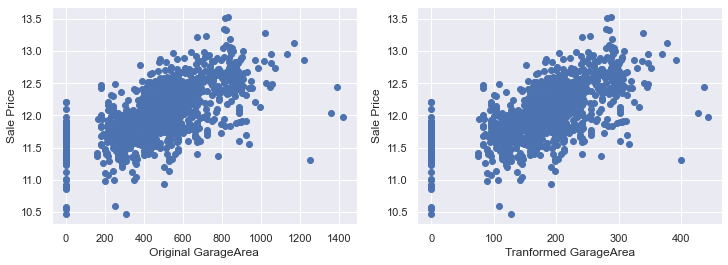

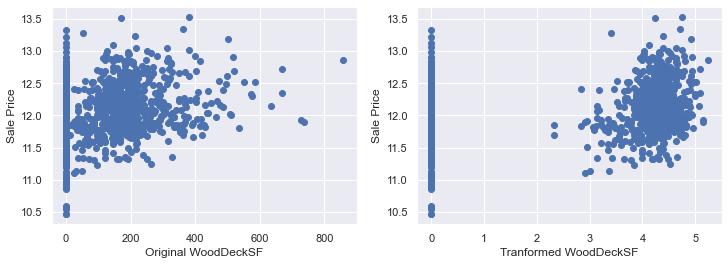

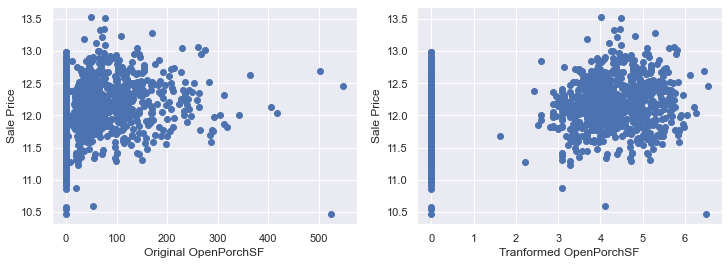

In [44]:
# Let's plot the original & transformed variables vs sale price
# This is to see if there is any relationship

for var in cont_vars:
    plt.figure(figsize=(12,4))
    
    # plot the original variable vs sale price
    plt.subplot(1,2,1)
    plt.scatter(data[var], np.log(data['SalePrice']))
    plt.ylabel("Sale Price")
    plt.xlabel('Original ' + var)
    
    # Plot transformed variable vs sale price
    plt.subplot(1,2,2)
    plt.scatter(tmp[var], np.log(tmp['SalePrice']))
    plt.ylabel('Sale Price')
    plt.xlabel('Tranformed ' + var)
    
    plt.show()

### Logarithmic Transformation

Let's go ahead and analyse the distributions of these variables after applying a logarithmic transformation

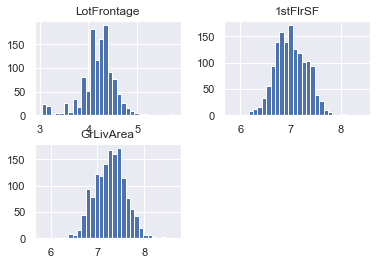

In [45]:
tmp = data.copy()

for var in ['LotFrontage','1stFlrSF','GrLivArea']:
    
    # transform the variable with logarithm
    tmp[var] = np.log(data[var])

tmp[['LotFrontage','1stFlrSF','GrLivArea']].hist(bins=30)
plt.show()

The distribution of the variables are now more "Gaussian' looking

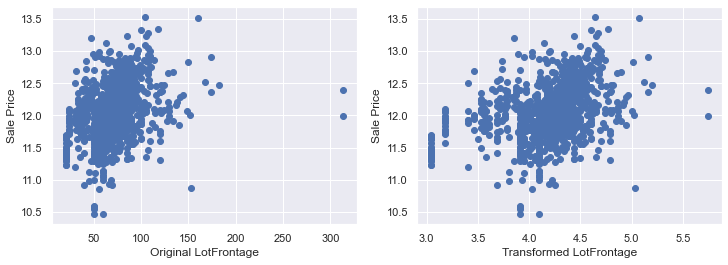

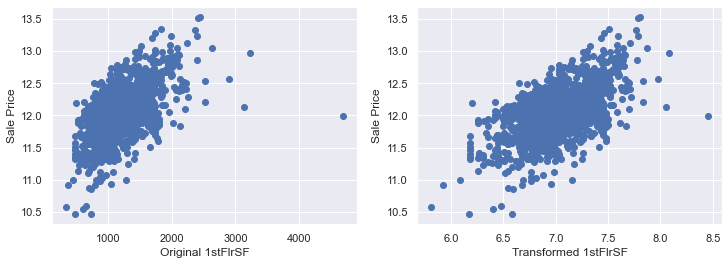

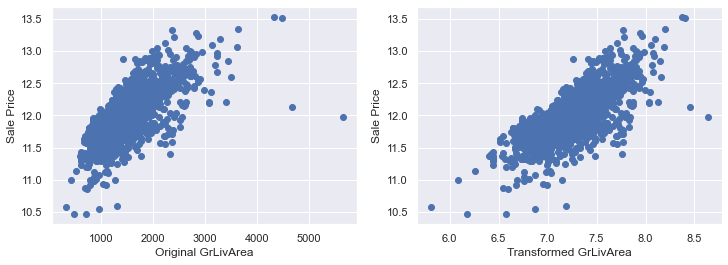

In [47]:
# Let's explore the relationship with the target

for var in ['LotFrontage','1stFlrSF','GrLivArea']:
    
    plt.figure(figsize=(12,4))
    
    #plot the original variable vs Sale Price
    plt.subplot(1,2,1)
    plt.scatter(data[var], np.log(data['SalePrice']))
    plt.xlabel('Original ' + var)
    plt.ylabel('Sale Price')
    
    #plot transformed variable vs sale price
    plt.subplot(1,2,2)
    plt.scatter(tmp[var], np.log(tmp['SalePrice']))
    plt.xlabel('Transformed ' + var)
    plt.ylabel('Sale Price')
    
    plt.show()

### Skewed Variables

Let's transform them into binary variables and see how predictive they are:

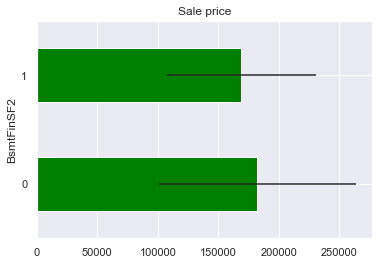

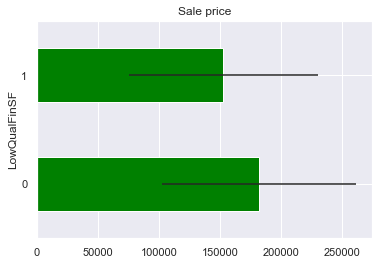

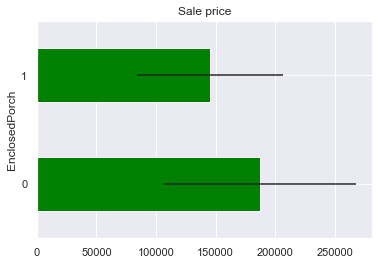

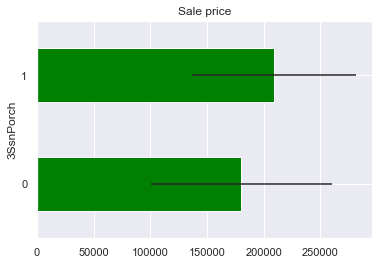

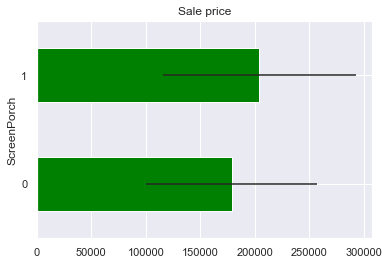

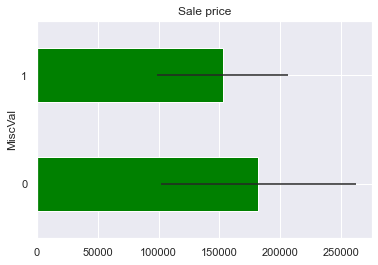

In [49]:
for var in skewed:
    
    tmp = data.copy()
    
    # map the variable values into 0 and 1
    tmp[var] = np.where(data[var]==0, 0, 1)
    
    # determine mean sale price in the mapped values
    tmp = tmp.groupby(var)['SalePrice'].agg(['mean','std'])
    
    # plot a bar graph
    tmp.plot(kind='barh', y='mean', legend=False, xerr='std', title="Sale price", color='green')
    
    plt.show()

## Categorical Variables

Cardinality = Number of labels a variable can take.

<AxesSubplot:>

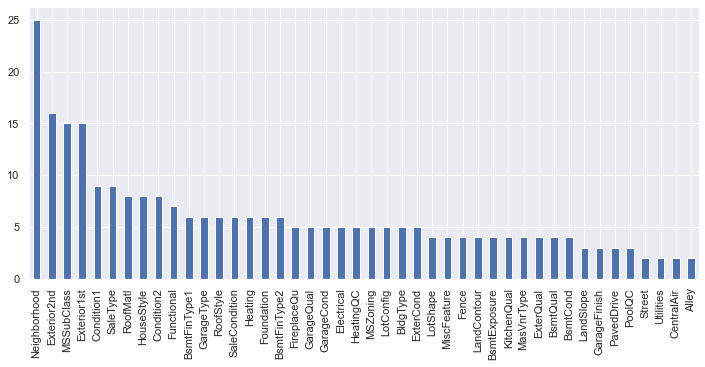

In [51]:
# we use unique categories with pandas nunique() and plot them in descending order

data[cat_vars].nunique().sort_values(ascending=False).plot.bar(figsize=(12,5))

#### Quality Variables

There are a number of variables that refer to the quality of some aspect of the hour. For example, the garage, or the fence of kitchen. We will replace these categories by numbers increasing with the quality of the place or room.

One Example:
- Ex = Excellent
- Gd = Good
- TA = Average/Typical
- Fa = Fair
- Po = Poor

In [52]:
# Re-map strings, which determine quality, to numbers.

qual_mappings = {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5, 'Missing':0, 'NA':0}

qual_vars = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu',
            'GarageQual', 'GarageCond']

for var in qual_vars:
    data[var] = data[var].map(qual_mappings)

In [53]:
exposure_mappings = {'No':1, 'Mn':2, 'Av':3, 'Gd':4, 'Missing':0, 'NA':0}

var = 'BsmtExposure'

data[var] = data[var].map(exposure_mappings)

In [54]:
finish_mappings = {'Missing':0, 'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ': 6}

finish_vars = ['BsmtFinType1', 'BsmtFinType2']

for var in finish_vars:
    data[var] = data[var].map(finish_mappings)

In [55]:
garage_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}

var  = 'GarageFinish'

data[var] = data[var].map(garage_mappings)

In [56]:
fence_mappings = {'Missing': 0, 'NA': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}

var = 'Fence'

data[var] = data[var].map(fence_mappings)

In [57]:
# Capture all quality variables

qual_vars = qual_vars + finish_vars + ['BsmtExposure','GarageFinish','Fence']

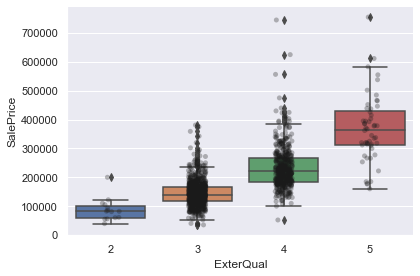

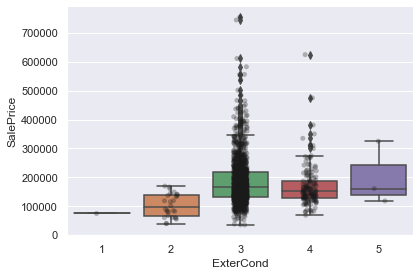

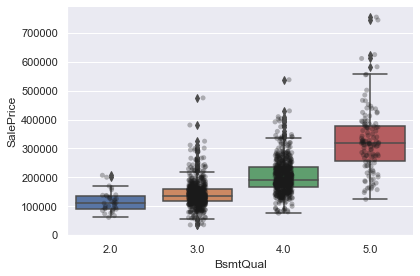

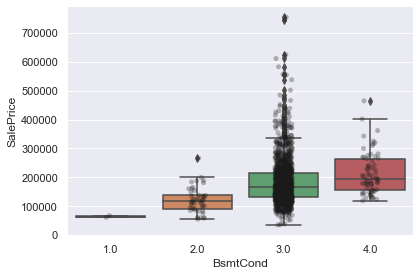

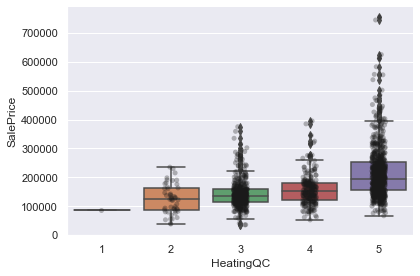

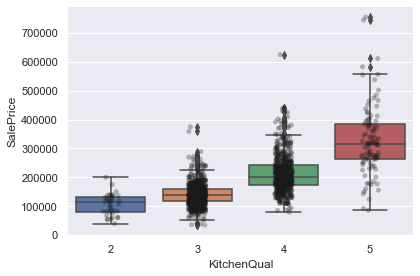

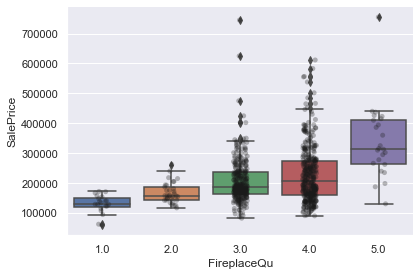

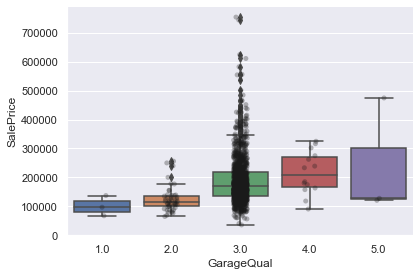

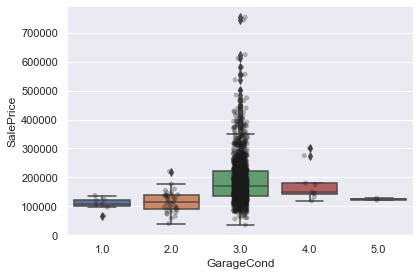

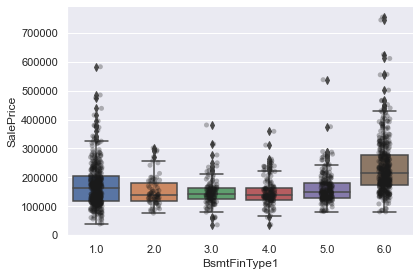

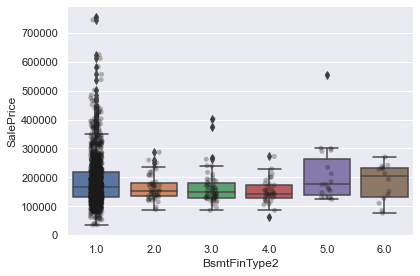

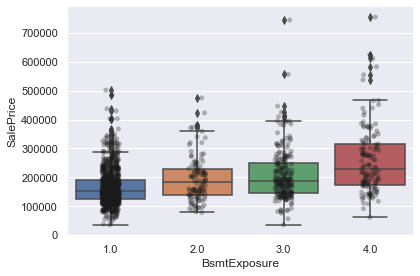

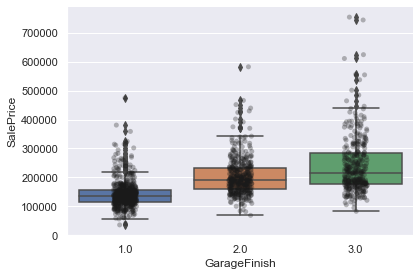

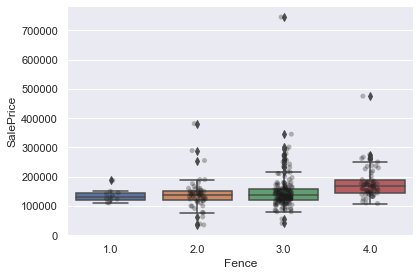

In [58]:
# Now let's plot the house mean sale price based on the quality of the various attributes

for var in qual_vars:
    
    # make boxplot with catplot
    sns.catplot(x=var, y='SalePrice', data=data, kind='box', height=4, aspect=1.5)
    
    # add data points to boxplot with stripplot
    sns.stripplot(x=var, y='SalePrice', data=data, jitter=0.1, alpha=0.3, color='k')
    plt.show()

In [59]:
# Capture all remaining categorical variables which we didn't remap

cat_others = [var for var in cat_vars if var not in qual_vars]

len(cat_others)

30

### Rare Labels

Let's go ahead and investigate now if there are labels that are present only in a small number of houses:


In [60]:
def analyse_rare_labels(df, var, rare_perc):
    df = df.copy()
    
    # determine the % of observations per category
    tmp = df.groupby(var)['SalePrice'].count() / len(df)
    
    # Return categories that are rare
    return tmp[tmp < rare_perc]

# Print categories that are present less than 1% of the observations

for var in cat_others:
    print(analyse_rare_labels(data,var,0.01))
    print()

MSZoning
C (all)    0.006849
Name: SalePrice, dtype: float64

Street
Grvl    0.00411
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

LotShape
IR3    0.006849
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

Utilities
NoSeWa    0.000685
Name: SalePrice, dtype: float64

LotConfig
FR3    0.00274
Name: SalePrice, dtype: float64

LandSlope
Sev    0.008904
Name: SalePrice, dtype: float64

Neighborhood
Blueste    0.001370
NPkVill    0.006164
Veenker    0.007534
Name: SalePrice, dtype: float64

Condition1
PosA    0.005479
RRAe    0.007534
RRNe    0.001370
RRNn    0.003425
Name: SalePrice, dtype: float64

Condition2
Artery    0.001370
Feedr     0.004110
PosA      0.000685
PosN      0.001370
RRAe      0.000685
RRAn      0.000685
RRNn      0.001370
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

HouseStyle
1.5Unf    0.009589
2.5Fin    0.005479
2.5Unf    0.007534
Name: SalePrice, dtype: float64

RoofStyle
Flat

Finally, we want to explore the relationship between the categories of the different variables and the house sale prices

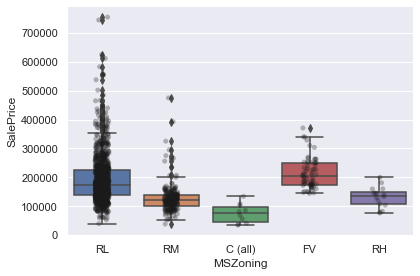

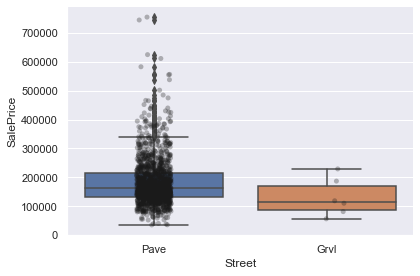

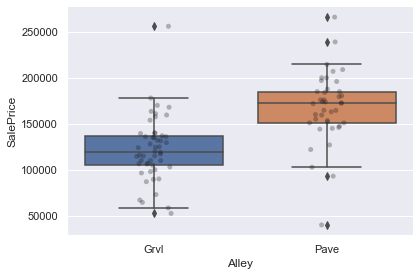

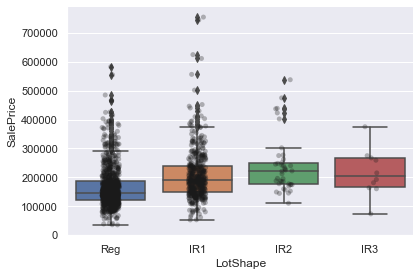

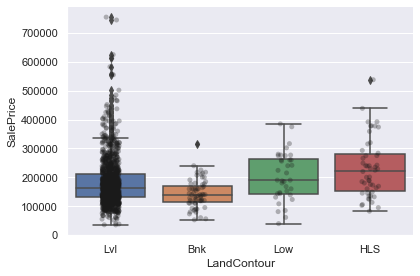

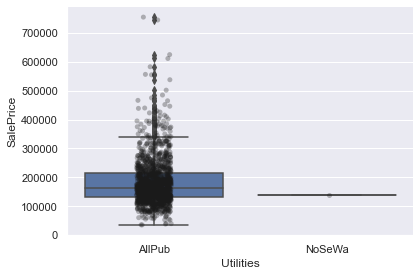

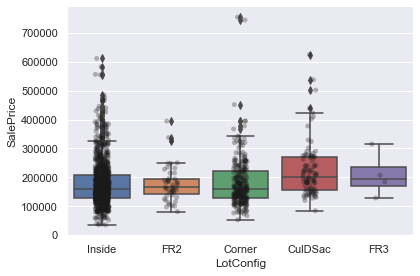

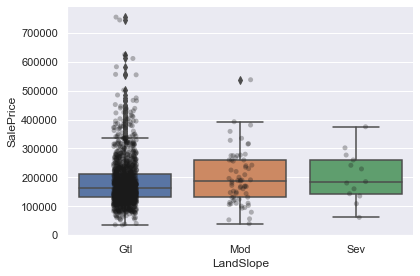

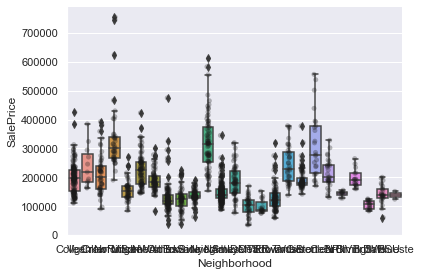

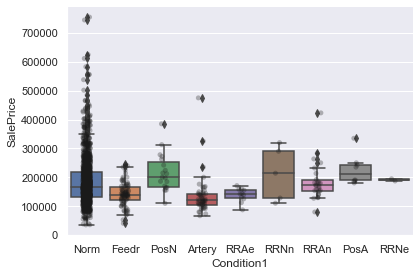

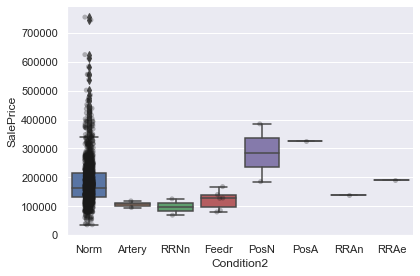

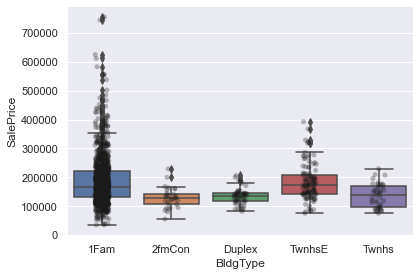

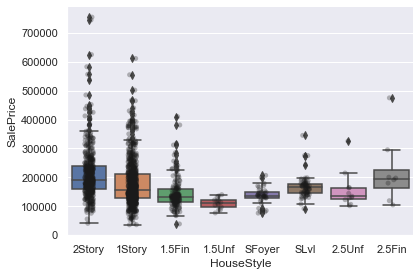

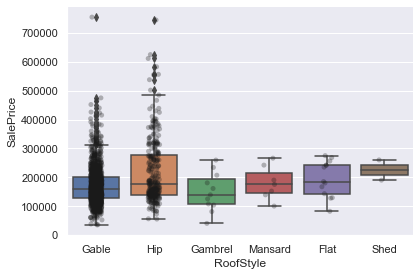

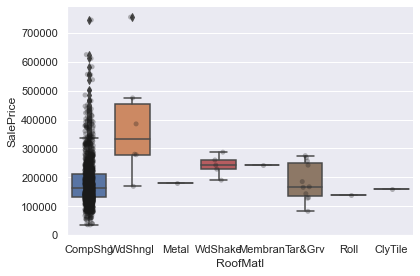

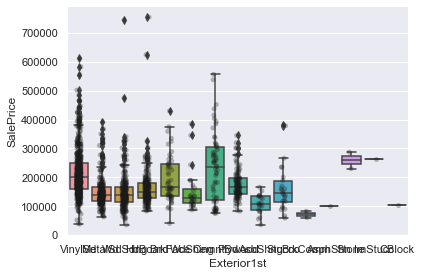

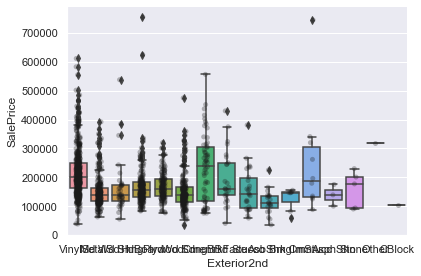

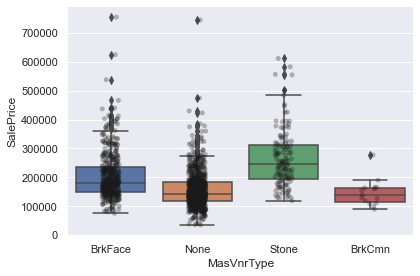

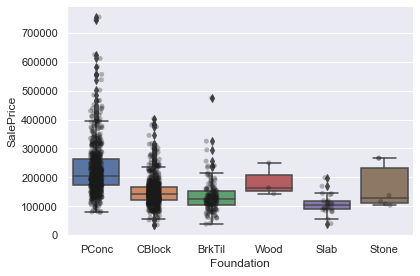

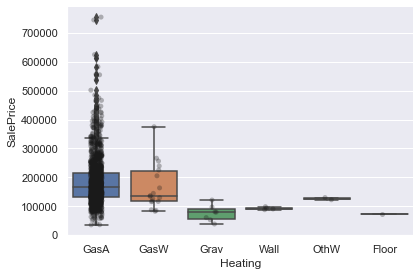

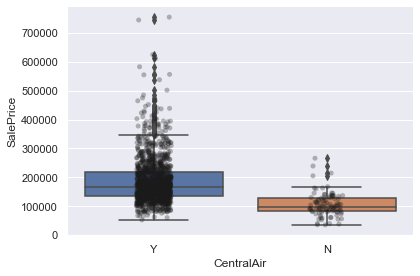

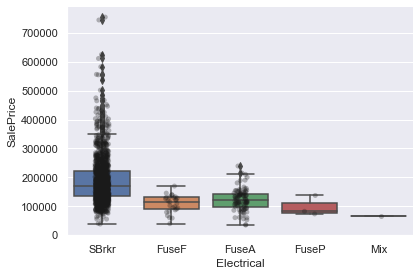

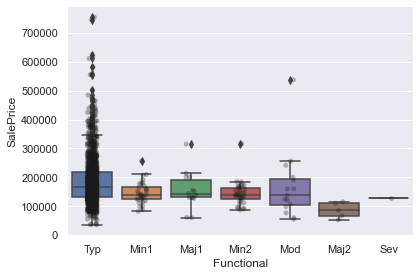

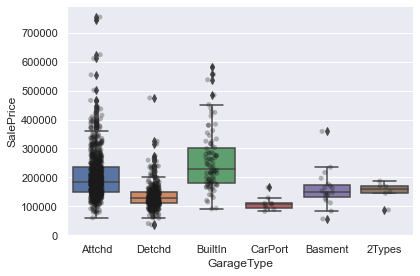

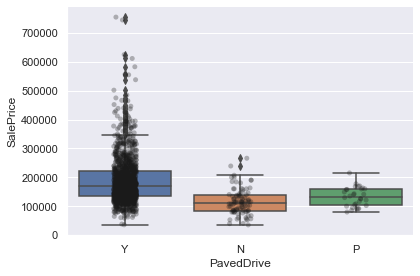

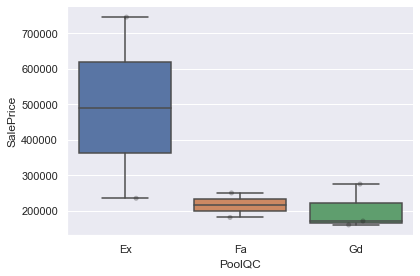

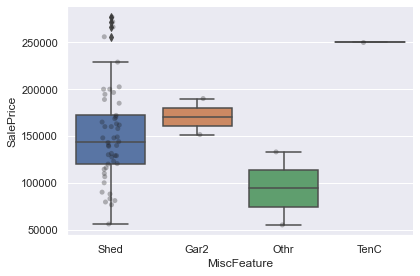

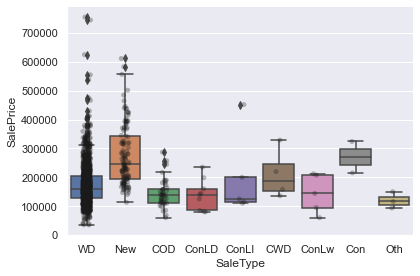

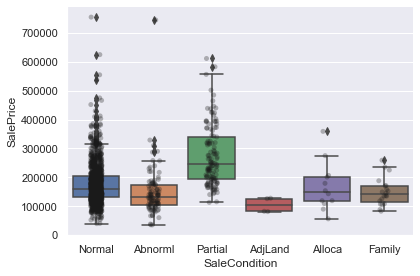

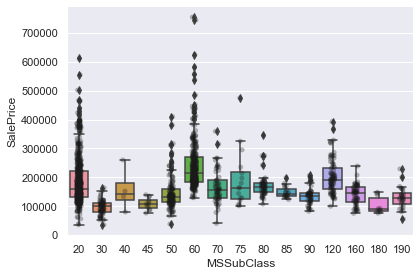

In [61]:
for var in cat_others:
    
    # make box plot with catplot
    sns.catplot(x=var, y='SalePrice', data=data, kind='box',height=4, aspect=1.5)
    
    # add data points to boxplot with stripplot
    sns.stripplot(x=var, y='SalePrice', data=data, jitter=0.1, alpha=0.3, color='k')
    plt.show()